In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

# Load the dataset
df = pd.read_csv("athlete_events.zip")

# Display first few rows
df.head()


ValueError: Multiple files found in ZIP file. Only one file per ZIP: ['athlete_events.csv', 'noc_regions.csv']

In [5]:
import zipfile

# Open the zip file and extract the specific CSV
with zipfile.ZipFile("athlete_events.zip") as z:
    with z.open("athlete_events.csv") as f:
        df = pd.read_csv(f)

df.head()


ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [6]:
# Filter only the rows where a medal was won
medals_df = df[df['Medal'].notnull()]

# Display few rows to check
medals_df.head()


ID                      Name Sex   Age  Height  Weight            Team  \
3    4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
37  15      Arvo Ossian Aaltonen   M  30.0     NaN     NaN         Finland   
38  15      Arvo Ossian Aaltonen   M  30.0     NaN     NaN         Finland   
40  16  Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0         Finland   
41  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   

    NOC        Games  Year  Season       City       Sport  \
3   DEN  1900 Summer  1900  Summer      Paris  Tug-Of-War   
37  FIN  1920 Summer  1920  Summer  Antwerpen    Swimming   
38  FIN  1920 Summer  1920  Summer  Antwerpen    Swimming   
40  FIN  2014 Winter  2014  Winter      Sochi  Ice Hockey   
41  FIN  1948 Summer  1948  Summer     London  Gymnastics   

                                     Event   Medal  
3              Tug-Of-War Men's Tug-Of-War    Gold  
37  Swimming Men's 200 metres Breaststroke  Bronze  
38  Swimming Men's 400 metres Breaststroke  Bronze  
40             Ice Hockey Men's Ice Hockey  Bronze  
41  Gymnastics Men's Individual All-Around  Bronze

In [7]:
# Count total medals by country (NOC code)
medal_count = medals_df['NOC'].value_counts().reset_index()
medal_count.columns = ['Country_Code', 'Total_Medals']

# Show top 10
medal_count.head(10)


Country_Code  Total_Medals
0          USA          5637
1          URS          2503
2          GER          2165
3          GBR          2068
4          FRA          1777
5          ITA          1637
6          SWE          1536
7          CAN          1352
8          AUS          1320
9          RUS          1165

C:\Users\Aditi\AppData\Local\Temp\ipykernel_3356\1188654514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Country_Code', y='Total_Medals', palette='viridis')


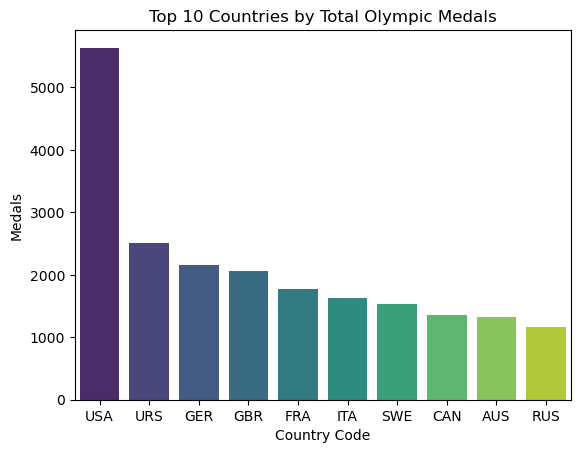

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

top10 = medal_count.head(10)

sns.barplot(data=top10, x='Country_Code', y='Total_Medals', palette='viridis')
plt.title("Top 10 Countries by Total Olympic Medals")
plt.xlabel("Country Code")
plt.ylabel("Medals")
plt.show()


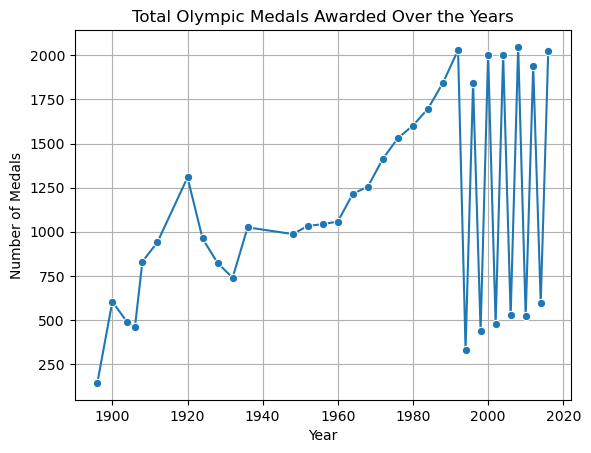

In [9]:
# Group medals by year
medals_by_year = medals_df.groupby('Year')['Medal'].count().reset_index()

sns.lineplot(data=medals_by_year, x='Year', y='Medal', marker='o')
plt.title("Total Olympic Medals Awarded Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.show()


C:\Users\Aditi\AppData\Local\Temp\ipykernel_3356\3612488293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.values, y=top_sports.index, palette='coolwarm')


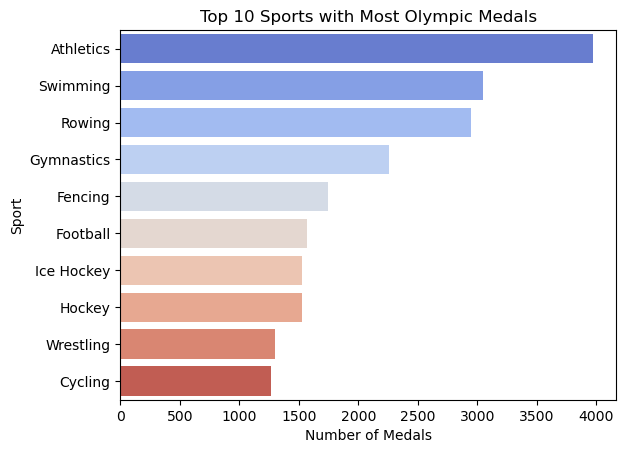

In [10]:
top_sports = medals_df['Sport'].value_counts().head(10)

sns.barplot(x=top_sports.values, y=top_sports.index, palette='coolwarm')
plt.title("Top 10 Sports with Most Olympic Medals")
plt.xlabel("Number of Medals")
plt.ylabel("Sport")
plt.show()


In [11]:
medal_count.to_csv("medals_by_country.csv", index=False)
medals_by_year.to_csv("medals_by_year.csv", index=False)


C:\Users\Aditi\AppData\Local\Temp\ipykernel_3356\3811866080.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Country_Code', y='Total_Medals', palette='viridis')


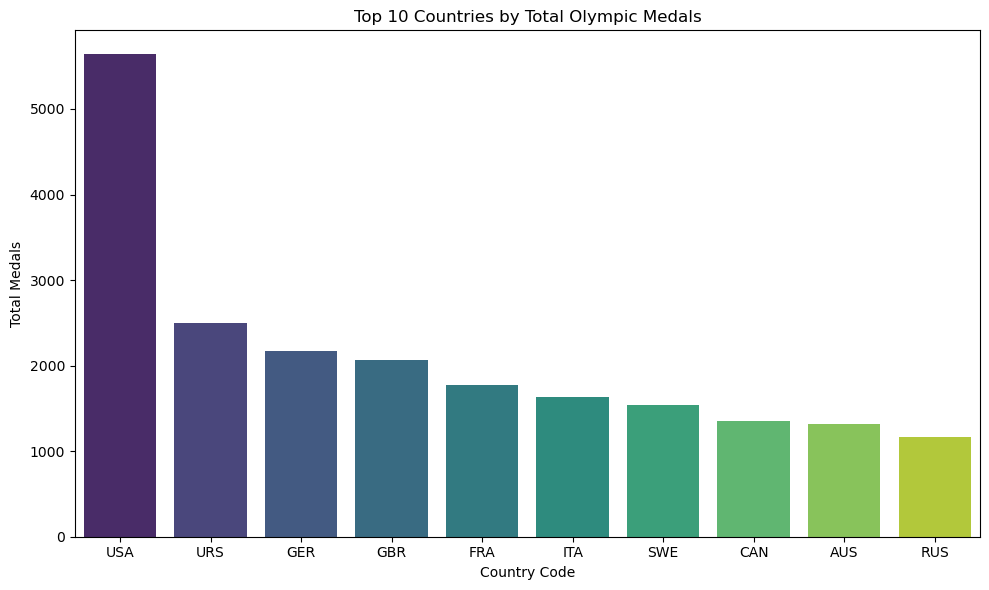

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reload CSV just in case
import pandas as pd
medal_count = pd.read_csv("medals_by_country.csv")

# Plot and save
plt.figure(figsize=(10,6))
top10 = medal_count.head(10)
sns.barplot(data=top10, x='Country_Code', y='Total_Medals', palette='viridis')
plt.title("Top 10 Countries by Total Olympic Medals")
plt.xlabel("Country Code")
plt.ylabel("Total Medals")
plt.tight_layout()
plt.savefig("top_10_countries_medals.png")  # Save
plt.show()


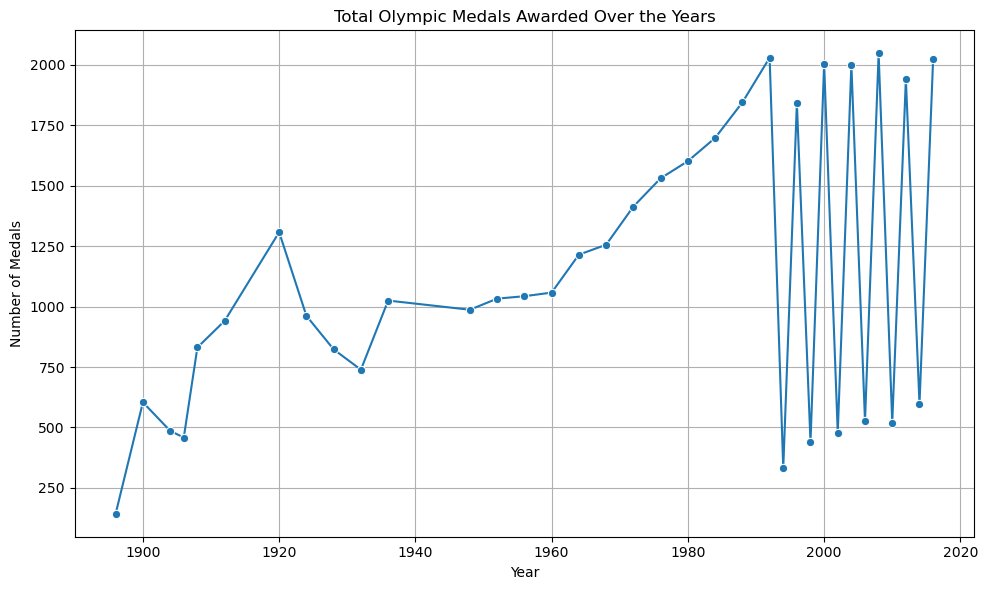

In [13]:
# Reload the CSV
medals_by_year = pd.read_csv("medals_by_year.csv")

plt.figure(figsize=(10,6))
sns.lineplot(data=medals_by_year, x='Year', y='Medal', marker='o')
plt.title("Total Olympic Medals Awarded Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.tight_layout()
plt.savefig("medals_over_years.png")  # Save
plt.show()


In [14]:
# Load NOC to country mapping
noc_df = pd.read_csv("noc_regions.csv")

# Merge with medal count
cleaned_medals = pd.merge(medal_count, noc_df, left_on='Country_Code', right_on='NOC', how='left')
cleaned_medals = cleaned_medals[['region', 'Total_Medals']]
cleaned_medals.columns = ['Country', 'Total_Medals']

# Save the cleaned file
cleaned_medals.to_csv("cleaned_medals_by_country.csv", index=False)

# Show few rows
cleaned_medals.head()


FileNotFoundError: [Errno 2] No such file or directory: 'noc_regions.csv'

In [15]:
import zipfile
import pandas as pd

# Step 1: Extract the second file from the ZIP
with zipfile.ZipFile("athlete_events.zip") as z:
    with z.open("noc_regions.csv") as f:
        noc_df = pd.read_csv(f)

# Step 2: Merge with your medal count
medal_count = pd.read_csv("medals_by_country.csv")
cleaned_medals = pd.merge(medal_count, noc_df, left_on='Country_Code', right_on='NOC', how='left')

# Step 3: Keep only needed columns
cleaned_medals = cleaned_medals[['region', 'Total_Medals']]
cleaned_medals.columns = ['Country', 'Total_Medals']

# Step 4: Save the final file
cleaned_medals.to_csv("cleaned_medals_by_country.csv", index=False)

# Step 5: Preview it
cleaned_medals.head()


Country  Total_Medals
0      USA          5637
1   Russia          2503
2  Germany          2165
3       UK          2068
4   France          1777

In [16]:
import zipfile
import pandas as pd

# Step 1: Load medals by country
medal_count = pd.read_csv("medals_by_country.csv")

# Step 2: Load noc_regions.csv from the ZIP
with zipfile.ZipFile("athlete_events.zip") as z:
    with z.open("noc_regions.csv") as f:
        noc_df = pd.read_csv(f)

# Step 3: Merge using 'Country_Code' from medals and 'NOC' from noc_regions
cleaned_medals = pd.merge(medal_count, noc_df, left_on='Country', right_on='NOC', how='left')

# Step 4: Keep only full country names and medals
cleaned_medals = cleaned_medals[['region', 'Total_Medals']]
cleaned_medals.columns = ['Country', 'Total_Medals']

# Step 5: Sort and save
cleaned_medals = cleaned_medals.sort_values(by='Total_Medals', ascending=False)
cleaned_medals.to_csv("cleaned_medals_by_country.csv", index=False)

# Step 6: Preview
cleaned_medals.head()


KeyError: 'Country'

In [17]:
import pandas as pd

medal_count = pd.read_csv("medals_by_country.csv")
print(medal_count.columns)


Index(['Country_Code', 'Total_Medals'], dtype='object')


In [18]:
medal_count.columns = medal_count.columns.str.strip()


In [19]:
import zipfile
import pandas as pd

# Step 1: Load medals by country
medal_count = pd.read_csv("medals_by_country.csv")
medal_count.columns = medal_count.columns.str.strip()  # Clean up column names

# Step 2: Load noc_regions.csv from the ZIP
with zipfile.ZipFile("athlete_events.zip") as z:
    with z.open("noc_regions.csv") as f:
        noc_df = pd.read_csv(f)
        noc_df.columns = noc_df.columns.str.strip()  # Clean just in case

# Step 3: Merge using 'Country' from medals and 'NOC' from noc_regions
cleaned_medals = pd.merge(medal_count, noc_df, left_on='Country', right_on='NOC', how='left')

# Step 4: Keep only full country names and medals
cleaned_medals = cleaned_medals[['region', 'Total_Medals']]
cleaned_medals.columns = ['Country', 'Total_Medals']

# Step 5: Sort and save
cleaned_medals = cleaned_medals.sort_values(by='Total_Medals', ascending=False)
cleaned_medals.to_csv("cleaned_medals_by_country.csv", index=False)

# Step 6: Preview
cleaned_medals.head()


KeyError: 'Country'

In [20]:
print(medal_count.columns)


Index(['Country_Code', 'Total_Medals'], dtype='object')


In [21]:
medal_count.columns = medal_count.columns.str.strip()


In [22]:
medal_count.columns = medal_count.columns.str.replace(r"^\ufeff", "", regex=True).str.strip()


In [23]:
print(medal_count.columns)


Index(['Country_Code', 'Total_Medals'], dtype='object')


In [24]:
import pandas as pd
import zipfile

In [25]:
medal_count = pd.read_csv("medals_by_country.csv")



In [26]:
medal_count.columns = medal_count.columns.str.strip()


In [27]:
with zipfile.ZipFile("athlete_events.zip") as z:
    with z.open("noc_regions.csv") as f:
        noc_df = pd.read_csv(f)
        noc_df.columns = noc_df.columns.str.strip()

In [28]:
merged = pd.merge(medal_count, noc_df, left_on='Country_Code', right_on='NOC', how='left')

In [29]:
cleaned_medals = merged[['region', 'Total_Medals']]
cleaned_medals.columns = ['Country', 'Total_Medals']

In [30]:
cleaned_medals = cleaned_medals.sort_values(by='Total_Medals', ascending=False)
cleaned_medals.to_csv("cleaned_medals_by_country.csv", index=False)


In [31]:
print(cleaned_medals.head())

   Country  Total_Medals
0      USA          5637
1   Russia          2503
2  Germany          2165
3       UK          2068
4   France          1777


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

In [34]:
top_10 = cleaned_medals.head(10)
sns.barplot(data=top_10, x="Country", y="Total_Medals", palette="viridis")

C:\Users\Aditi\AppData\Local\Temp\ipykernel_3356\1081607431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x="Country", y="Total_Medals", palette="viridis")


<Axes: xlabel='Country', ylabel='Total_Medals'>

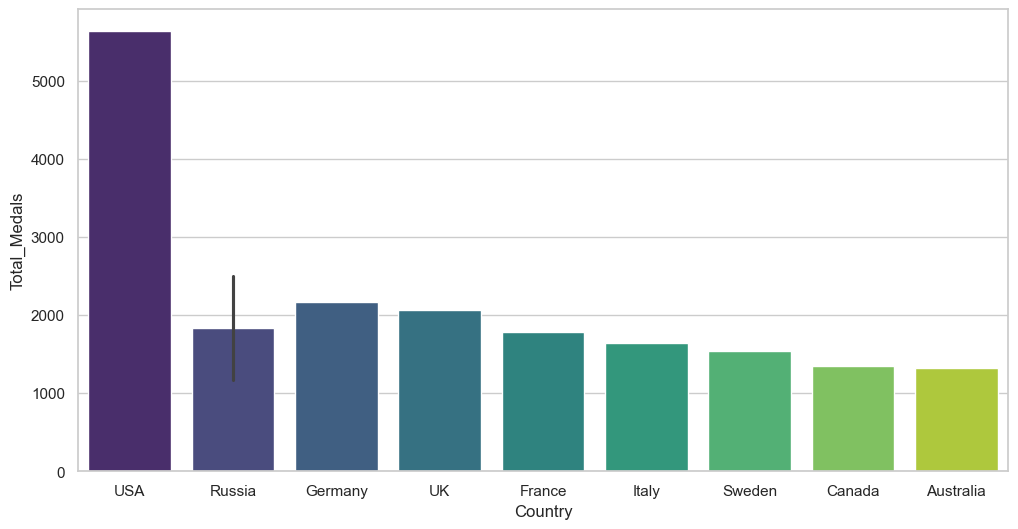

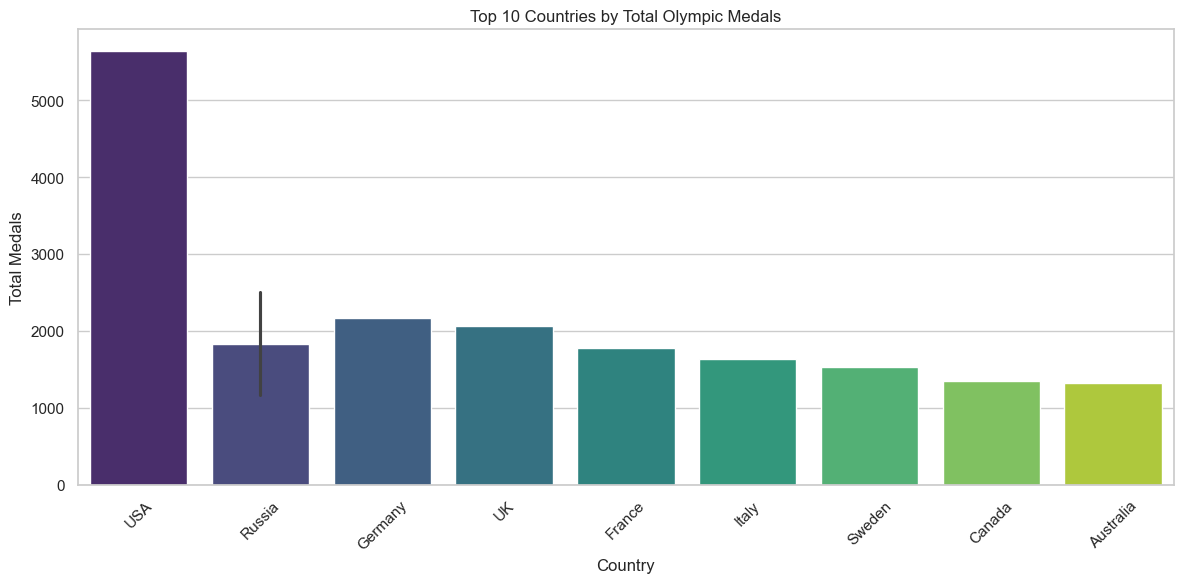

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Prepare top 10 countries
top_10 = cleaned_medals.head(10)

# Plot barplot with `hue=x` and legend disabled
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x="Country", y="Total_Medals", hue="Country", palette="viridis", legend=False)

plt.title("Top 10 Countries by Total Olympic Medals")
plt.ylabel("Total Medals")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
# Group medals by Year and Country
medals_by_year = olympics.groupby(['Year', 'Country'])['Medal'].count().reset_index()
medals_by_year.rename(columns={'Medal': 'Medal_Count'}, inplace=True)

# Filter for top 5 countries only
top_countries = ['USA', 'Russia', 'Germany', 'UK', 'France']
filtered_data = medals_by_year[medals_by_year['Country'].isin(top_countries)]


NameError: name 'olympics' is not defined

In [37]:
# Group medals by Year and Country
medals_by_year = df.groupby(['Year', 'Country'])['Medal'].count().reset_index()
medals_by_year.rename(columns={'Medal': 'Medal_Count'}, inplace=True)

# Filter for top 5 countries only
top_countries = ['USA', 'Russia', 'Germany', 'UK', 'France']
filtered_data = medals_by_year[medals_by_year['Country'].isin(top_countries)]


KeyError: 'Country'

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='Year', y='Medal_Count', hue='Country', marker='o')
plt.title("Medal Count Over Years for Top 5 Countries")
plt.xlabel("Olympic Year")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'filtered_data' is not defined

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('your_olympics_file.csv')  # change to your correct file name


FileNotFoundError: [Errno 2] No such file or directory: 'your_olympics_file.csv'

In [40]:
df = pd.read_csv('olympics_data.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'olympics_data.csv'

In [41]:
import os
print(os.getcwd())


C:\Users\Aditi\Olympic_Medal_Analysis


In [42]:
import os

# Set to your folder where the file actually exists
os.chdir(r'C:\Users\Aditi\Olympic_Medal_Analysis')


In [43]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'athlete_events.zip', 'cleaned_medals_by_country.csv', 'medals_by_country.csv', 'medals_by_year.csv', 'medals_over_years.png', 'olympic_analysis.ipynb', 'top_10_countries_medals.png']


In [44]:
medals_by_year = olympics.groupby(['Year', 'Country'])['Medal'].count().reset_index()


NameError: name 'olympics' is not defined

In [45]:
import pandas as pd

# Load the pre-processed data from your CSV
medals_by_year = pd.read_csv("medals_by_year.csv")

# Preview the columns
print(medals_by_year.columns)


Index(['Year', 'Medal'], dtype='object')


In [46]:
# Filter for top 5 countries
top_countries = ['USA', 'Russia', 'Germany', 'UK', 'France']
filtered_data = medals_by_year[medals_by_year['Country'].isin(top_countries)]


KeyError: 'Country'

In [47]:
import pandas as pd

# Load the athlete_events.csv dataset
olympics = pd.read_csv("athlete_events.csv")

# Preview columns
print(olympics.columns)


FileNotFoundError: [Errno 2] No such file or directory: 'athlete_events.csv'

In [48]:
import os
print(os.getcwd())


C:\Users\Aditi\Olympic_Medal_Analysis


In [49]:
import zipfile

# Extract the ZIP file
with zipfile.ZipFile("athlete_events.zip", "r") as zip_ref:
    zip_ref.extractall()

# Now read the CSV file
import pandas as pd
olympics = pd.read_csv("athlete_events.csv")

# Preview the data
print(olympics.head())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [50]:
medals_by_year = olympics.groupby(['Year', 'Team'])['Medal'].count().reset_index()


<Figure size 1200x600 with 0 Axes>

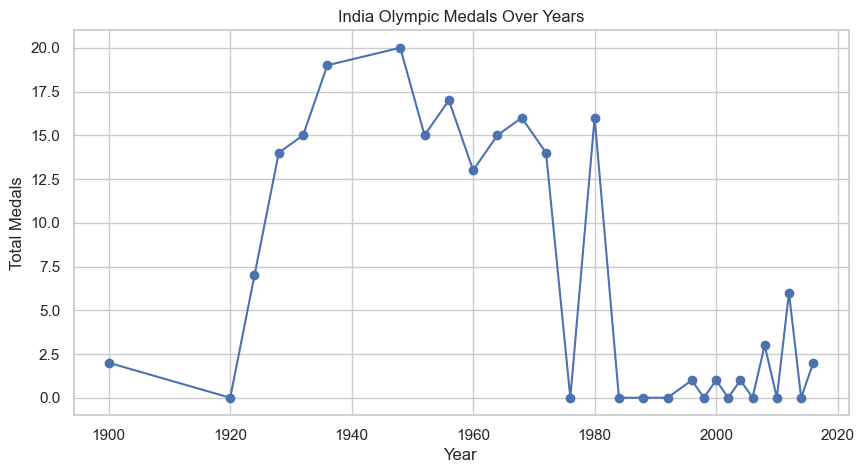

In [51]:
import matplotlib.pyplot as plt

# Rename for clarity
medals_by_year.columns = ['Year', 'Country', 'Medal_Count']

# Plot medals over years for a specific country, e.g., India
india_medals = medals_by_year[medals_by_year['Country'] == 'India']
plt.figure(figsize=(10, 5))
plt.plot(india_medals['Year'], india_medals['Medal_Count'], marker='o')
plt.title('India Olympic Medals Over Years')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.grid(True)
plt.show()


In [52]:
import seaborn as sns



In [53]:
top5_countries = medals_by_year.groupby('Country')['Medal_Count'].sum().sort_values(ascending=False).head(5).index

In [54]:
filtered_data = medals_by_year[medals_by_year['Country'].isin(top5_countries)]

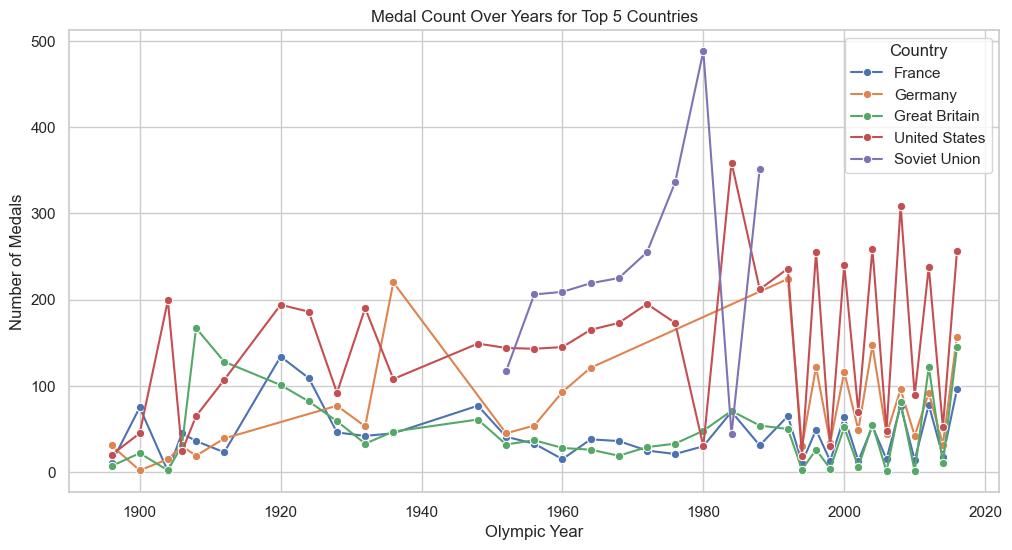

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='Year', y='Medal_Count', hue='Country', marker='o')
plt.title("Medal Count Over Years for Top 5 Countries")
plt.xlabel("Olympic Year")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.show()

C:\Users\Aditi\AppData\Local\Temp\ipykernel_3356\1249708155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


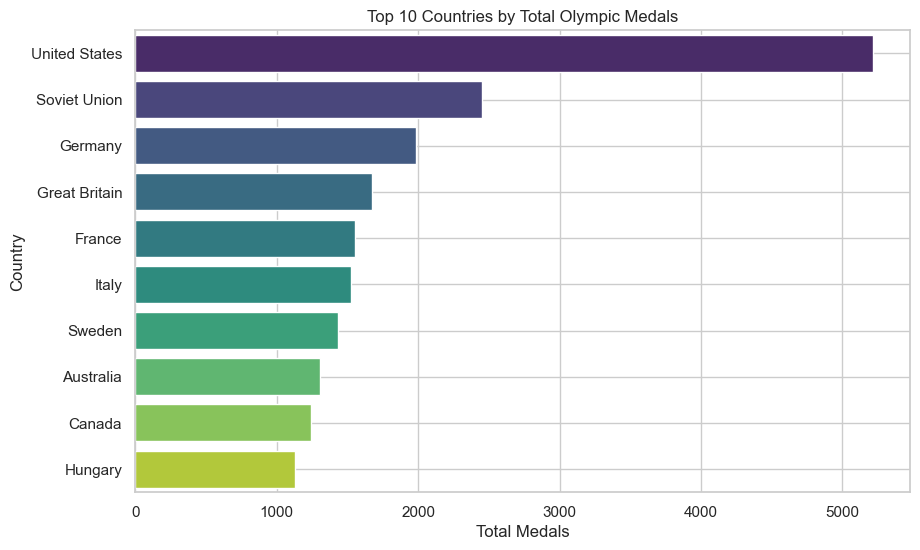

In [56]:
top_countries = medals_by_year.groupby('Country')['Medal_Count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Total Olympic Medals")
plt.xlabel("Total Medals")
plt.ylabel("Country")
plt.grid(True)
plt.show()


C:\Users\Aditi\AppData\Local\Temp\ipykernel_3356\364035941.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sport_medals.values, y=sport_medals.index, palette="magma")


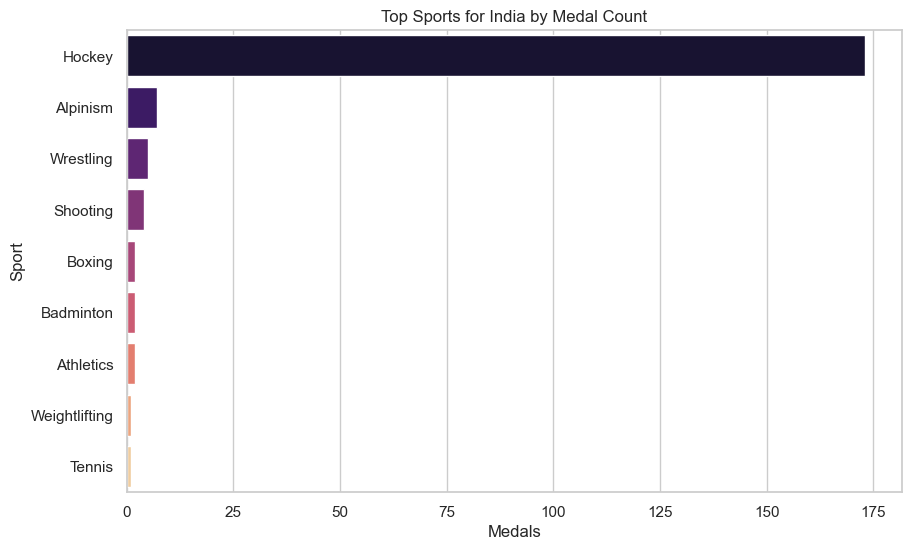

In [57]:
india_sports = olympics[(olympics['Team'] == 'India') & (olympics['Medal'].notna())]
sport_medals = india_sports['Sport'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=sport_medals.values, y=sport_medals.index, palette="magma")
plt.title("Top Sports for India by Medal Count")
plt.xlabel("Medals")
plt.ylabel("Sport")
plt.show()


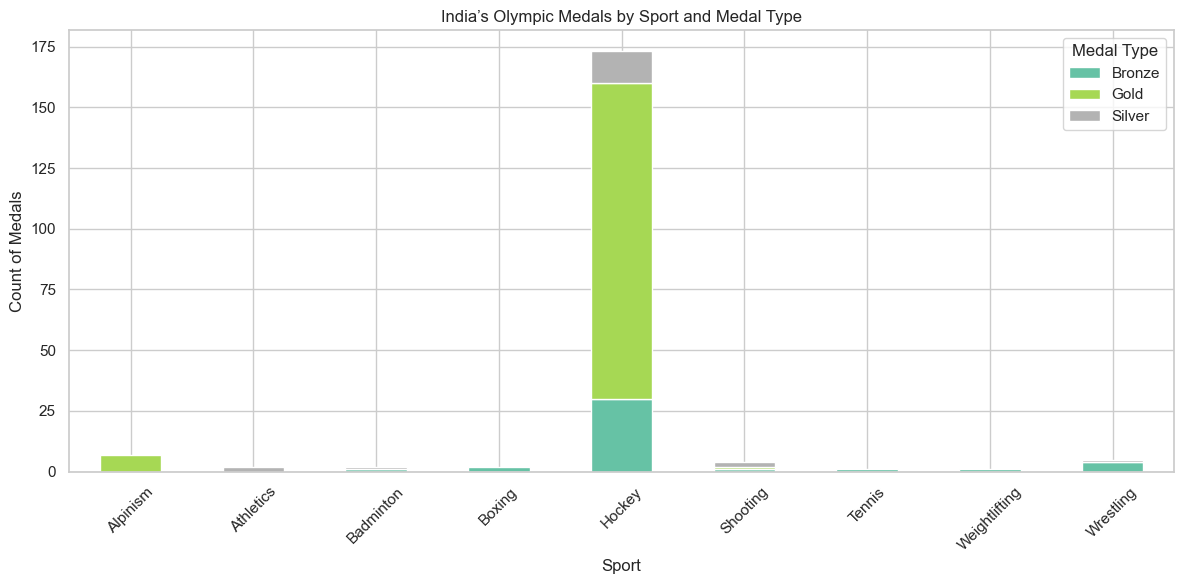

In [58]:
# Filter for India and medals
india_medals = olympics[(olympics['Team'] == 'India') & (olympics['Medal'].notna())]

# Group by Sport and Medal type
medals_by_sport = india_medals.groupby(['Sport', 'Medal']).size().unstack(fill_value=0)

# Plot stacked bar chart
medals_by_sport.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Indiaâ€™s Olympic Medals by Sport and Medal Type')
plt.xlabel('Sport')
plt.ylabel('Count of Medals')
plt.legend(title='Medal Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
